In [ ]:
from google.colab import files
f = files.upload()

Saving Test_LqhgPWU.csv to Test_LqhgPWU.csv
Saving Train_aBjfeNk.csv to Train_aBjfeNk.csv


# Imports

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.compose import make_column_transformer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import LinearSVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import GradientBoostingClassifier


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# EDA

In [ ]:
train = pd.read_csv('/content/Train_aBjfeNk.csv')
test = pd.read_csv('/content/Test_LqhgPWU.csv')

In [ ]:
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,0,1.0,22,1.0,5.0,1.0,0,4.0,3.0,4
1,462643,1,0.0,38,0.0,2.0,-9999.0,1,3.0,3.0,1
2,466315,1,0.0,67,0.0,2.0,1.0,0,1.0,5.0,2
3,461735,0,0.0,67,0.0,7.0,0.0,2,2.0,5.0,2
4,462669,1,0.0,40,0.0,3.0,-9999.0,2,6.0,5.0,1


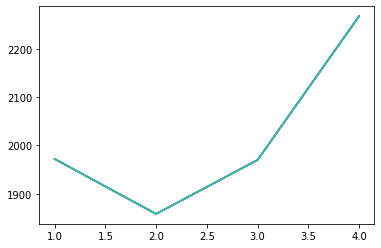

In [ ]:
train2 = train.drop(['Var_1'])

## One Hot Encoding and using Pipeline

In [ ]:
col = make_column_transformer((OneHotEncoder(),['Gender','Ever_Married','Graduated','Profession','Spending_Score','Var_1','Segmentation']),remainder='passthrough')

In [ ]:
pipe = make_pipeline(col,svc) # creating a pipeline between model and data

In [ ]:
cross_val_score(svc,X_train,y_train,cv=5,scoring = 'accuracy').mean()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn

nan

# Label Encoding

In [ ]:
train['Segmentation'].replace(to_replace=['A','B','C','D'],value=[1,2,3,4],inplace = True)

train.Gender.replace( {'Male':0,'Female':1},inplace = True)
test.Gender.replace({'Male':0,'Female':1},inplace = True)

train.Ever_Married.replace({'Yes':0,'No':1},inplace = True)
test.Ever_Married.replace({'Yes':0,'No':1},inplace = True)

train.Graduated.replace({'Yes':0,'No':1},inplace = True)
test.Graduated.replace({'Yes':0,'No':1},inplace = True)

train.Spending_Score.replace({'Low':0,'Average':1,'High':2},inplace=True)
test.Spending_Score.replace({'Low':0,'Average':1,'High':2},inplace=True)

train.Profession.replace({'Artist':0,'Doctor':1,'Engineer':2,'Entertainment':3,'Executive':4,'Healthcare':5,'Homemaker':6,'Lawyer':7,'Marketing':8},inplace = True)
test.Profession.replace({'Artist':0,'Doctor':1,'Engineer':2,'Entertainment':3,'Executive':4,'Healthcare':5,'Homemaker':6,'Lawyer':7,'Marketing':8},inplace = True)



train.Var_1.replace({'Cat_1':0,'Cat_2':1,'Cat_3':2,'Cat_4':3,'Cat_5':4,'Cat_6':5,'Cat_7':6},inplace = True)
test.Var_1.replace({'Cat_1':0,'Cat_2':1,'Cat_3':2,'Cat_4':3,'Cat_5':4,'Cat_6':5,'Cat_7':6},inplace = True)


In [ ]:
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,0,1.0,1,1.0,5.0,1.0,0,4.0,3.0,4
1,462643,1,0.0,2,0.0,2.0,NaN,1,3.0,3.0,1
2,466315,1,0.0,4,0.0,2.0,1.0,0,1.0,5.0,2
3,461735,0,0.0,4,0.0,7.0,0.0,2,2.0,5.0,2
4,462669,1,0.0,2,0.0,3.0,NaN,2,6.0,5.0,1


In [ ]:
for n,i in enumerate(train['Age']):
  if i > 20 and i <= 25:
    train['Age'][n] = 1
  elif i > 25  and i <= 40 :
    train['Age'][n] = 2
  elif i >40 and i <= 50:
    train['Age'][n] = 3
  elif i > 50 and i <= 90:
    train['Age'][n] = 4
  else:
    train['Age'][n] = 0



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__'

(array([266., 243., 271., 218., 200., 449., 379., 435., 232., 250., 443.,
        429., 435., 232., 226., 318., 321., 155., 341., 315.,  98., 203.,
         80., 192., 178.,  80.,  72., 127., 136., 120., 121.,  30.,  59.,
         59.,  58.,  42.,  71.,  55.,  58.,  71.]),
 array([18.   , 19.775, 21.55 , 23.325, 25.1  , 26.875, 28.65 , 30.425,
        32.2  , 33.975, 35.75 , 37.525, 39.3  , 41.075, 42.85 , 44.625,
        46.4  , 48.175, 49.95 , 51.725, 53.5  , 55.275, 57.05 , 58.825,
        60.6  , 62.375, 64.15 , 65.925, 67.7  , 69.475, 71.25 , 73.025,
        74.8  , 76.575, 78.35 , 80.125, 81.9  , 83.675, 85.45 , 87.225,
        89.   ]),
 <a list of 40 Patch objects>)

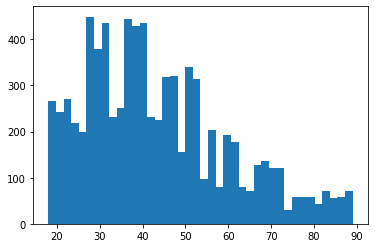

In [ ]:
plt.hist(train['Age'],bins = 40)

## Missing Values

In [ ]:
len(train)


8068

In [ ]:
len(test)

2627

In [ ]:
# since only less than 10 percent of data missing in Ever_married,Graduated,Profession, Var_1,Family_Size,Work_Experience
train = train.fillna(-9999)
test = test.fillna(-9999)

In [ ]:
nul = 'Train',train.isnull().sum(),'Test',test.isnull().sum()
nul

('Train', ID                 0
 Gender             0
 Ever_Married       0
 Age                0
 Graduated          0
 Profession         0
 Work_Experience    0
 Spending_Score     0
 Family_Size        0
 Var_1              0
 Segmentation       0
 dtype: int64, 'Test', ID                 0
 Gender             0
 Ever_Married       0
 Age                0
 Graduated          0
 Profession         0
 Work_Experience    0
 Spending_Score     0
 Family_Size        0
 Var_1              0
 dtype: int64)

In [ ]:
len(train),len(test)

(8068, 2627)

In [ ]:
train.Ever_Married=train.Ever_Married.astype('int64')
train.Graduated=train.Graduated.astype('int64')
train.Work_Experience=train.Work_Experience.astype('int64')
train.Family_Size=train.Family_Size.astype('int64')
train.Profession = train.Profession.astype('int64')
train.Var_1 = train.Var_1.astype('int64')
train.Spending_Score = train.Spending_Score.astype('int64')

test.Ever_Married=test.Ever_Married.astype('int64')
test.Graduated=test.Graduated.astype('int64')
test.Work_Experience=test.Work_Experience.astype('int64')
test.Family_Size=test.Family_Size.astype('int64')
test.Profession = test.Profession.astype('int64')
test.Var_1 = test.Var_1.astype('int64')
test.Spending_Score = test.Spending_Score.astype('int64')


In [ ]:
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,0,1,22,1,5,1,0,4,3,4
1,462643,1,0,38,0,2,-9999,1,3,3,1
2,466315,1,0,67,0,2,1,0,1,5,2
3,461735,0,0,67,0,7,0,2,2,5,2
4,462669,1,0,40,0,3,-9999,2,6,5,1


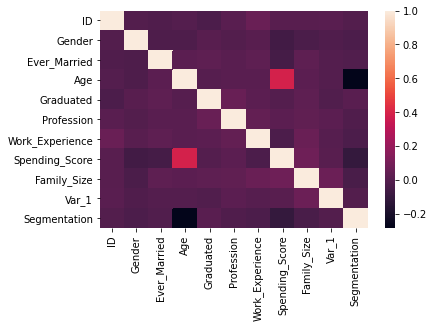

In [ ]:
cor = train.corr()
sns.heatmap(cor)
            # vmax=.3, center=0,
            # square=True, linewidths=.5, cbar_kws={"shrink": .5})

Correlation with age seems to be negative , that means as age increases the segmentation value(1,2,3,4) gets lower  


# Model

## Naive Bayes

In [ ]:
x = train.drop(['Segmentation','ID'],axis = 1)
y = train['Segmentation']

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

### Feature Scaling

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
nvb = GaussianNB()

In [ ]:
y_pred = nvb.fit(X_train,y_train)

In [ ]:
nvb.score(X_test,y_test)

0.3506815365551425

## KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
knn.score(X_test,y_test)

0.4454770755885997

## SVM

In [ ]:
svc = LinearSVC()

In [ ]:
svc.fit(X_train,y_train)

NameError: ignored

In [ ]:
svc.score(X_test,y_test)

0.436183395291202

## Decision Tree  
- If there is a high non-linearity & complex relationship between dependent & independent variables, a tree model will outperform a classical regression method.  
- If you need to build a model that is easy to explain to people, a decision tree model will always do better than a linear model. Decision tree models are even simpler to interpret than linear regression!
  
Measures to find root node:
- Entropy,
- Information gain,
- Gini index,
- Gain Ratio,
- Reduction in Variance
- Chi-Square

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
fit = dt.fit(X_train,y_train)

In [ ]:
fit.score(X_test,y_test)

0.4479553903345725

## Gradient Boosted Regression Tree  
https://stackabuse.com/gradient-boosting-classifiers-in-python-with-scikit-learn/

In [ ]:
l_list = [0.05,0.075,0.1,0.25,0.75,1]
for learning_rate in l_list:
  gb_clf = GradientBoostingClassifier(n_estimators = 20, learning_rate= learning_rate,max_features = 2,max_depth = 2, random_state = 0)
  gb_clf.fit(X_train,y_train)

In [ ]:
gb_clf.score(X_test,y_test)

0.5

In [ ]:
len(test)

2627

In [ ]:
xtest = test.drop(['ID'],axis = 1)

In [ ]:
res = pd.DataFrame(gb_clf.predict(xtest))

In [ ]:
xtest.shape

(2627, 9)

In [ ]:
res.to_csv('output1.csv')